### Homework 6
**1. Plot**

f =
  function_handle with value:
    @(x)x-4*sin(2*x)+3.245892718783470


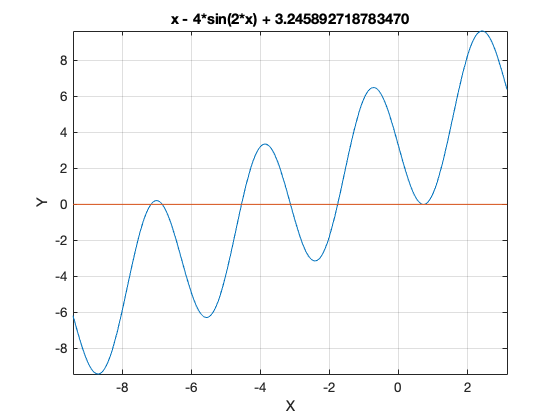

In [1]:
%plot inline
intv = [-3*pi pi];
f = @(x) x - 4*sin(2*x) + 3.245892718783470
l = @(x) x;


fplot(f, intv); 
hold on
fplot(l(0), intv);
grid on

title('x - 4*sin(2*x) + 3.245892718783470')
xlabel('X')
ylabel('Y')

**Comments:** From inspection it appears there are approximately 6 (possibly 7 around x=1) zeros for the function.

**2A. Algorithms: Bisection**
Save as `biseQ.m`
``` 
function [x,delt_x,i] = biseQ(f,brac,TOL,err)

    a = min(brac);
    b = max(brac);

%input 4
if nargin < 4
    err = eps;    %f(x)-tolerance, default to machine epsilon if no input
end

%input 3
if nargin < 3
    TOL = eps;    %delta(x)-tolerance, default to machine epsilon if no input (hazardous)
end

i = 1;
while abs(b-a) > TOL       %will stop iterating when delta-x tolerance is met
    x(i) = (b-a)/2 + a;    %selecting midpoint
    delt_x(i) = (b-a)/2;   %storing initial error
    if abs(f(x(i)))<=err   %will stop iterating when f(x) tolerance is met
        return
    end
if sign(f(x(i))) == sign(f(a))  %will "toe-in" ensuring x=0 is contained in new interval eg. f(a)f(b)<0
        a = x(i);
    else
        b = x(i);
        end
i = i + 1;
end
i=i-1;
end
````
        
**2B. Algorithms: Newton**
<br>Save as `NxtxN.m`
```
function [x,i] = NxtxN(f,gues,TOL,err)

%input 4
if nargin < 4  %default F(x) tolerance
    err = eps;
end

%input 3
if nargin < 3  %default delta(x) tolerance (hazardous)
    TOL = eps;
end

%input 2
if nargin < 2 %default guess around origin (hazardous)
    x(1) = 0;
else
    x(1) = gues;
end


%input 1, valid use since using newton implies we know df/dx
Df = sym(f); f = horner(Df); f = matlabFunction(f);  %changes f to nested polynomial
Df = diff(Df); Df = horner(Df); Df = matlabFunction(Df);  %differntiates f to nested polynomial



%plot for fun when function is used standalone
    %fplot(f,[-gues gues],'LineWidth',1)
    %hold on
    %line([-gues gues],[0 0])


i = 1;
while abs( f(x(i)) / Df(x(i)) ) > max(eps(x(i)),TOL)  %will stop if x+h = x in float for small-h or TOL is met
    Y = f(x(i)); m = Df(x(i)); xnot = x(i);
    
    if abs(Y) <= err  %will stop if f(x) tolerance met
        return
    end
    
    x(i+1) = xnot-[Y/m]; %iteration from x(i) to x(i+1), step size |h| = |f*(Df)^-1|
    
    
%plot for fun optional
    %pops = @(t) Y + (t-xnot)*m
    %if x(i) < x(i+1)
       %range = [x(i),x(i+1)]
    %else
        %range = [x(i+1),x(i)]
    %end
        %fplot(pops,range)

    i = i+1;
    end
i=i-1;
end
```

**2C. Algorithms: Secant**
<br>Save as `SxCxnT.m`
```
function [x,i] = SxCxnT(f,brac,TOL,err)

%input 4
if nargin < 4
    err = eps; %sets default f(x) tolerance
end

%input 3
if nargin < 3
    TOL = eps; %default delta(x) tolerance
end

%input 2
if nargin < 2
    x(1) = -1; x(2) = 1;
else
    x(1)=min(brac); x(2) = max(brac); %sets left most and rightmost endpoints
end

%input 1
Df = sym(f);
f = horner(Df); f = matlabFunction(f); %nested polynomial from function

i = 2;
while abs(x(i)-x(i-1)) > TOL
    
    if abs(f(x(i))) > abs(f(x(i-1)))   %nifty swaps a-b and fa-fb to keep |f(x_n)|<|f(x_n-1)|, Cheney/Kincaid
    x1 = x(i);
    x0 = x(i-1);
    f1 = f(x(i));
    f0 = f(x(i-1));
    else
    x0 = x(i);
    x1 = x(i-1);
    f0 = f(x(i));
    f1 = f(x(i-1));
    end
    
    if abs(f0)<err   %stops evaultion if f(x) tolerance met
        return
    end
    
    x(i+1) = x0 - f0*[x0-x1]/[f0 - f1];   %iterating as in newton, but Df^-1 = (difference quotient)^-1
    
    i = i + 1;
    end
i=i-2;
end
```

**3.Using Methods**

In [2]:
TOL = 10^(-10);
brac = [-4.8 -4.2];
guess = -4.2;

format long

[B_root, delt_x,i1]= biseQ(f,brac,TOL); B_0 = B_root(end), disp(i1)
[N_root,i2] = NxtxN(f,guess,TOL); N_0 = N_root(end), disp(i2)
[S_root,i3] = SxCxnT(f,brac,TOL); S_0 = S_root(end), disp(i3)
Tru_root=fzero(f, -4.2)

B_0 =
  -4.546767488750631
    33
N_0 =
  -4.546767488788789
     4
S_0 =
  -4.546767488787903
     6
Tru_root =
  -4.546767488787903


**3.Comments:**
<br> With the given tolerances and starting points (guess for Newton)
<br>Bisection computed -4.54676748875063 as a root in 33 iterations.
<br>Newton computed -4.54676748878879 as a root in just 4 iterations.
<br>Secant computed -4.5467674887879 as a root in 6 iterations. 
<br>*But secant got the matlab "true" fzero root with the given tolerance and initial guesses (endpoints).*

**4.Convergence**

In [3]:
Tru_root=fzero(f, -4.2)

N_err = abs(N_root'-Tru_root);
S_err = abs(S_root'-Tru_root);
B_err = abs(delt_x)';

N_err_lim = abs(N_err(2:end))./abs(N_err(1:end-1)).^2;
S_err_lim = abs(S_err(2:end))./abs(S_err(1:end-1)).^1.618033988749895;
B_err_lim = abs(B_err(2:end))./abs(B_err(1:end-1));

TableN = [[0:i2]',N_err,[0;N_err_lim]];
TableS = [[0,[0:i3]]',S_err,[0;S_err_lim]];
TableB = [[1:i1]',[B_err],[0;B_err_lim]];

format long
Newton = array2table(TableN,'VariableNames',{'Iter','Error','Conv_Rate_R2'})
Secant = array2table(TableS,'VariableNames',{'Iter','Error','Conv_Rate_R162'})
Bisection = array2table(TableB,'VariableNames',{'Iter','Error','Conv_Rate_R1'})

Tru_root =
  -4.546767488787903
Newton =
  5x3 table
    Iter           Error              Conv_Rate_R2   
    ____    ____________________    _________________
     0         0.346767488787902                    0
     1         0.131335054107858     1.09220437173923
     2       0.00238419649199173    0.138223132165513
     3      1.70827134660101e-06    0.300519575778594
     4      8.86402062860725e-13    0.303750530653838
Secant =
  8x3 table
    Iter           Error             Conv_Rate_R162  
    ____    ____________________    _________________
     0         0.253232511212097                    0
     0         0.346767488787902      3.2001044808794
     1        0.0332250356698962    0.184373712760645
     2       0.00721376012840835     1.78024937934442
     3      7.71031856947602e-05    0.225236875845941
     4      1.66257663636316e-07    0.750997426907802
     5      3.89466237038505e-12    0.362639814920466
     6                         0                    0
Bisectio

**4.Comments:**
<br>It is exceptionally difficult to estimate the rate of convergence 
<br>for Secant and Newton because they do so at a rapid pace.
<br>However, the estimations both in class and in Kincaid/Cheney seem to fit
<br>the data. Newton with an r = 2 (quadratic convergence) seems to show lim(ek+1/ek)
<br>approaching a non-zero real number.
<br>Likewise Secant with an r = 1.62ish (nearly quadratic/super linear) seems to behave
<br>similarly.
<br>Bisection method clearly has a linear rate of convergence since it halfs its error
<br>on every iteration. r = 1 by inspection.
<br>Notice that when viewing the actual error per iteration, Newton doubles the amount of <br>precision (comparing leading zeros after decimal) every iteration. 
<br>
<br>**For Newton** by trial and error using r=3 for newton will show divergence in the limit, r = 1 will show convergence to 0.
<br>**For Secant** by trial and error using r=1 shows convergence to zero, r=2 will show divergence in the limit.

**5.Newton Again:**

In [4]:
Tru_root=.722734247813416

[N_root,i2] = NxtxN(f,1);

N_err = abs(N_root'-Tru_root);
N_err_lim = abs(N_err(2:end))./abs(N_err(1:end-1));
N_err_lim2 = abs(N_err(2:end))./abs(N_err(1:end-1)).^2;

TableN2 = [[0:i2]',N_err,[0;N_err_lim2],[0;N_err_lim]];
Newton2 = array2table(TableN2,'VariableNames',{'Iter','Error','Conv_Rate_R2','Conv_Rate_R1'})

Tru_root =
   0.722734247813416
Newton2 =
  27x4 table
    Iter           Error              Conv_Rate_R2        Conv_Rate_R1   
    ____    ____________________    ________________    _________________
      0        0.277265752186584                   0                    0
      1        0.136660889889723    1.77767263286823    0.492887739693715
      2        0.068295123022737    3.65679995490666    0.499741535986243
      3       0.0341919590044074    7.33068571754304    0.500650082920623
      4        0.017113787891412    14.6385539222085     0.50052083559196
      5      0.00856219708491546    29.2343155366379    0.500309875244632
      6      0.00428253177418225    58.4157764284469    0.500167390648721
      7      0.00214163770197473    116.773639437604    0.500086821278442
      8      0.00107091349814414    233.486828029585    0.500044193822649
      9     0.000535480622879558    466.911934347488    0.500022292937317
     10      0.00026774630643267    933.761511009941    0

**5.Comments:**
<br>From the table it can be observed that the Netwon convergence rate near x=.722734(ish) <br>is nearly linear with an R=1.
<br>An R = 2 (quadratic) leads to divergence in the limit(ek+1/ek).
<br>This indicates that perhaps around our initial guess and near the root the given
<br>function likely has a multiple root and that f'(x) is nearly zero. 